<a href="https://colab.research.google.com/github/srimantmahapatra/srimant_code_repo_pub/blob/master/UCI_ML_Classification_Credit_Approval_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Credit Approval Data Set downloaded from https://archive.ics.uci.edu/ml/datasets/Credit+Approval

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('/content/drive/My Drive/ML/UC_ML_Credit_Approval/crx.csv')

In [3]:
# Check the fields,count the datatypes and then see the categorical data types how many are there in each column

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [4]:
df.dtypes.value_counts()

object     12
int64       2
float64     2
dtype: int64

In [5]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

A1       3
A2     350
A4       4
A5       4
A6      15
A7      10
A9       2
A10      2
A12      2
A13      3
A14    171
A16      2
dtype: int64

In [6]:
#Replace all ? with Null values
df=df.replace('?',np.NaN)

In [7]:
#Convert target value to integer value
df['A16']=df['A16'].replace('+',1)
df['A16']=df['A16'].replace('-',0)


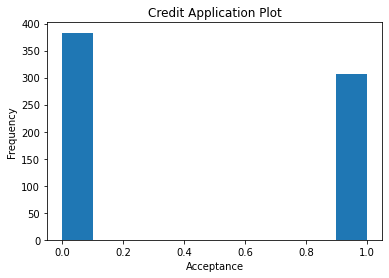

In [8]:
#Check the data is balanced or imbalanced in the target value
df['A16'].plot.hist(title = 'Credit Application Plot')
plt.xlabel('Acceptance');


In [9]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [10]:
#Check the missing values percentage
missing_values = missing_values_table(df)
missing_values.head(20)


Your selected dataframe has 16 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
A14,13,1.9
A1,12,1.7
A2,12,1.7
A6,9,1.3
A7,9,1.3
A4,6,0.9
A5,6,0.9


In [11]:
# Replace missing values by mode ONLY for categorical/object data this wll help during one hot encoding other wise it will fail
#need to be careful as int values have to be handled separately
mis_cat_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If the object column evaluate to true
        if df[col].isnull().any() == True:
            # Replace the NaN value by mode/ most frequently occuring value
            df[col]=df[col].fillna(df[col].mode()[0])
           
                 
            # Keep track of how many columns were label encoded
            mis_cat_count += 1
            
print('%d object columns were replaced.' % mis_cat_count)

7 object columns were replaced.


In [12]:
#Check the missing values percentage again
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [13]:
# Create a label encoder object for all categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
         
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


11 columns were label encoded.


In [14]:
df.dtypes.value_counts()

int64      14
float64     2
dtype: int64

In [15]:
# Find correlations with the target and sort
correlations = df.corr()['A16'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 A8     0.322475
A11    0.406410
A10    0.458301
A9     0.720407
A16    1.000000
Name: A16, dtype: float64

Most Negative Correlations:
 A4    -0.194306
A5    -0.185134
A13   -0.100867
A1    -0.028934
A7     0.000866
Name: A16, dtype: float64


In [16]:
#Split data into X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = np.int64(classifier.predict(X_test))
cm = np.array(confusion_matrix(y_test, y_pred))
print(cm)
accuracy_score(y_test, y_pred)

[[80 14]
 [14 65]]


0.838150289017341

In [20]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = np.array(confusion_matrix(y_test, y_pred))
print(cm)
accuracy_score(y_test, y_pred)


[[78 16]
 [ 6 73]]


0.8728323699421965

In [22]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[87  7]
 [29 50]]


0.791907514450867

In [24]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[83 11]
 [21 58]]


0.815028901734104

In [26]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[85  9]
 [20 59]]


0.8323699421965318